In [1]:
import sys
sys.path.append("../../src")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
REPORT = True
if REPORT:
    sns.set(font_scale=1.5)

## Load and preprocess data

In [5]:
import data

In [6]:
# set db path hackily
data._get_connection("../../data/participants.db")

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("experiment_id", "materials_id", "item_id", "condition_id"))

response_df = raw_df[(raw_df.experiment_id == "09_comprehension_swarm-full-nonalternating-control") & (raw_df.trial_type == "html-slider-response-with-copout")]

Missing datastring for uid A33LYSCQQU1YDJ:31JLPPHS2VIHTNHTYQX3Y0LM83NO3X. Status was 1.
Missing datastring for uid A1VWP7HOSGKATD:37WLF8U1WQEX0FJWJ038YMGXYHE6KK. Status was 1.
Missing datastring for uid A6QDP0HAGE9W5:3V0Z7YWSIZONYPU7V25CAIA2YANV2I. Status was 1.
Missing datastring for uid A19VDBNACNJNI8:3ZY8KE4ISKR4Q8WSXDVD6085GQIQVU. Status was 1.
Missing datastring for uid AQ5TMPEPN5UIP:3QUO65DNQVC1SHUCDAT4L9BMNIZUO9. Status was 1.
Missing datastring for uid A3I1W58P6SIV26:3LEP4MGT3HOVSLUHNAYT5P7ZWFIBD3. Status was 1.
Missing datastring for uid A3V4AW6DGWBHDO:3ERET4BTVNXKIYLUH76KIW70TBHK9X. Status was 1.
Missing datastring for uid A12VDN3TJJCAQQ:33TIN5LC05YF23ABLM7BR4MBRUY9YX. Status was 1.
Missing datastring for uid A11EMV89KB6OCM:3DL65MZB8E3JUW0NX558MRV3F30EC8. Status was 1.
Missing datastring for uid A1HRH92NH49RX2:3Z4GS9HPNWYS90QHJGJR0VB8S6T77C. Status was 1.
Missing datastring for uid A29RCIFHRAZ797:33C7UALJVMMIYSGY45UODLGQ11O18G. Status was 1.
Missing datastring for uid AROOCBM

In [7]:
# Drop dupes.
print(f"Dropping {response_df.index.duplicated().sum()} dupe results.")
response_df = response_df[~response_df.index.duplicated()]

Dropping 0 dupe results.


In [8]:
# Expand condition data
response_df = pd.concat([response_df,
                         response_df.condition_id.apply(pd.Series).rename(columns=lambda k: f"condition_{k}")],
                        axis=1) \
    .drop(columns="condition_id")

In [9]:
# Convert condition_id to independent features
response_df["agent_is_given"] = response_df["condition_0"] == 0
response_df["agent_is_subject"] = response_df["condition_1"].map({0: False, 1: True, 2: None})
response_df["is_nonalternating_control"] = response_df["condition_1"] == 2

In [10]:
# Norm slider values within-subject.
response_df["slider_value_normed"] = \
    response_df.groupby("uniqueid").slider_value.apply(lambda xs: (xs - xs.mean()) / xs.std())

In [11]:
# dtype fixes
response_df["slider_copout"] = response_df.slider_copout.astype(bool)
response_df["dateTime"] = pd.to_datetime(response_df.dateTime, unit="ms")

In [12]:
response_df.head()

,,condition,counterbalance,assignmentId,workerId,hitId,trial_type,rt,internal_node_id,dateTime,experiment_id,...,slider_copout,response,image_copout,condition_0,condition_1,condition_2,agent_is_given,agent_is_subject,is_nonalternating_control,slider_value_normed
trial_index,uniqueid,,,,,,,,,,,,,,,,,,,,,
3,A2G43KS55YGYQE:3MD9PLUKKJ20WVOAIISZNCQX508ZNF,0,0,3MD9PLUKKJ20WVOAIISZNCQX508ZNF,A2G43KS55YGYQE,3DWNFENNE3JLNOB7SP5FCP0GXCG4JG,html-slider-response-with-copout,9673.6,0.0-3.0,2021-10-22 18:50:32.424,09_comprehension_swarm-full-nonalternating-con...,...,False,NaN,NaN,practice,solid,full,False,NaN,False,1.206994
4,A2G43KS55YGYQE:3MD9PLUKKJ20WVOAIISZNCQX508ZNF,0,0,3MD9PLUKKJ20WVOAIISZNCQX508ZNF,A2G43KS55YGYQE,3DWNFENNE3JLNOB7SP5FCP0GXCG4JG,html-slider-response-with-copout,4801.4,0.0-4.0,2021-10-22 18:50:37.227,09_comprehension_swarm-full-nonalternating-con...,...,False,NaN,NaN,practice,liquid,full,False,NaN,False,1.206994
5,A2G43KS55YGYQE:3MD9PLUKKJ20WVOAIISZNCQX508ZNF,0,0,3MD9PLUKKJ20WVOAIISZNCQX508ZNF,A2G43KS55YGYQE,3DWNFENNE3JLNOB7SP5FCP0GXCG4JG,html-slider-response-with-copout,5569.5,0.0-5.0,2021-10-22 18:50:42.798,09_comprehension_swarm-full-nonalternating-con...,...,False,NaN,NaN,practice,abstract,empty,False,NaN,False,-1.128532
6,A2G43KS55YGYQE:3MD9PLUKKJ20WVOAIISZNCQX508ZNF,0,0,3MD9PLUKKJ20WVOAIISZNCQX508ZNF,A2G43KS55YGYQE,3DWNFENNE3JLNOB7SP5FCP0GXCG4JG,html-slider-response-with-copout,3949.1,0.0-6.0,2021-10-22 18:50:46.749,09_comprehension_swarm-full-nonalternating-con...,...,False,NaN,NaN,practice,solid,empty,False,NaN,False,-1.359518
7,A2G43KS55YGYQE:3MD9PLUKKJ20WVOAIISZNCQX508ZNF,0,0,3MD9PLUKKJ20WVOAIISZNCQX508ZNF,A2G43KS55YGYQE,3DWNFENNE3JLNOB7SP5FCP0GXCG4JG,html-slider-response-with-copout,4910.2,0.0-7.0,2021-10-22 18:50:51.661,09_comprehension_swarm-full-nonalternating-con...,...,False,NaN,NaN,practice,abstract,full,False,NaN,False,0.796352


In [13]:
response_df.to_csv("raw_responses.csv")

## Preliminaries

In [14]:
N = len(response_df.reset_index().uniqueid.unique())
N

99

### Demo

In [15]:
qualitative_df = raw_df[(raw_df.experiment_id == "09_comprehension_swarm-full-nonalternating-control") & raw_df.trial_type.isin(("survey-text", "survey-multi-choice"))]

<AxesSubplot:xlabel='survey_answer', ylabel='Count'>

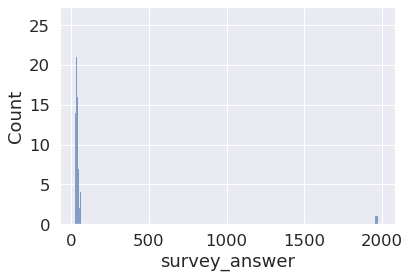

In [16]:
ages = qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id == "0.0-0.0")].survey_answer.astype(int)
sns.histplot(ages)

In [17]:
education = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 0)].survey_answer
education.value_counts()

Bachelor's degree    62
Master's degree      18
Some college         14
High school/GED       5
Name: survey_answer, dtype: int64

In [18]:
native = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 1)].survey_answer
native.value_counts()

Yes    98
No      1
Name: survey_answer, dtype: int64

### Comments

In [19]:
list(qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id != "0.0-0.0")].survey_answer)

['',
 'good',
 'no',
 '',
 '',
 '',
 '',
 '',
 'good',
 '',
 '',
 '',
 '',
 'none',
 'nice',
 'INTERESITNG SURVEY FOR ENGLISH SPEAKERS ',
 '',
 '',
 '',
 '',
 '',
 'VERY INTERESTING',
 'VERY INTERSTING THIS HIT ',
 'i would like to work on this experiment',
 '',
 'This was fun, thanks!',
 'the study was good',
 '',
 'NO',
 '',
 'Nothing',
 '',
 'good',
 'NONE',
 'nice survey',
 'Fun survey! ',
 'GREAT SURVEY',
 'The study was good',
 'n/a',
 'n/a',
 '',
 'n/a',
 'no',
 'Thanks.',
 'N/A',
 'Nice experiment and thanks for the opportunity.',
 "Even if a garden is swarming with bees, it could be a very low concentration compared to the maximum number of bees that could possibly be there. Many of these use language indicating a lot, but it's still small relative to the max.",
 '',
 '',
 '',
 'good',
 'Thanks for this study and it is quite interesting',
 'good',
 'good',
 'great',
 "I don't have any comments",
 'ITS GOOD I LIKE THIS EXPERIMENT',
 'good',
 'Good survey',
 'good one.',
 'GOOD'

### Total times

Text(0.5, 1.0, 'Total study time (minutes)')

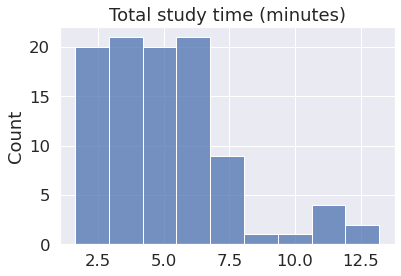

In [20]:
sns.histplot(pd.concat([response_df, qualitative_df]).groupby("uniqueid").apply(lambda rows: rows.rt.sum() / 1000 / 60))
plt.title("Total study time (minutes)")

In [21]:
pd.concat([response_df, qualitative_df]).groupby("uniqueid").rt.sum().apply(lambda xs: xs / 1000 / 60).agg(["mean", "std"])

mean    4.981281
std     2.477397
Name: rt, dtype: float64

### Response times

In [22]:
# sns.displot(data=response_df, x="rt", hue="uniqueid", kind="hist")

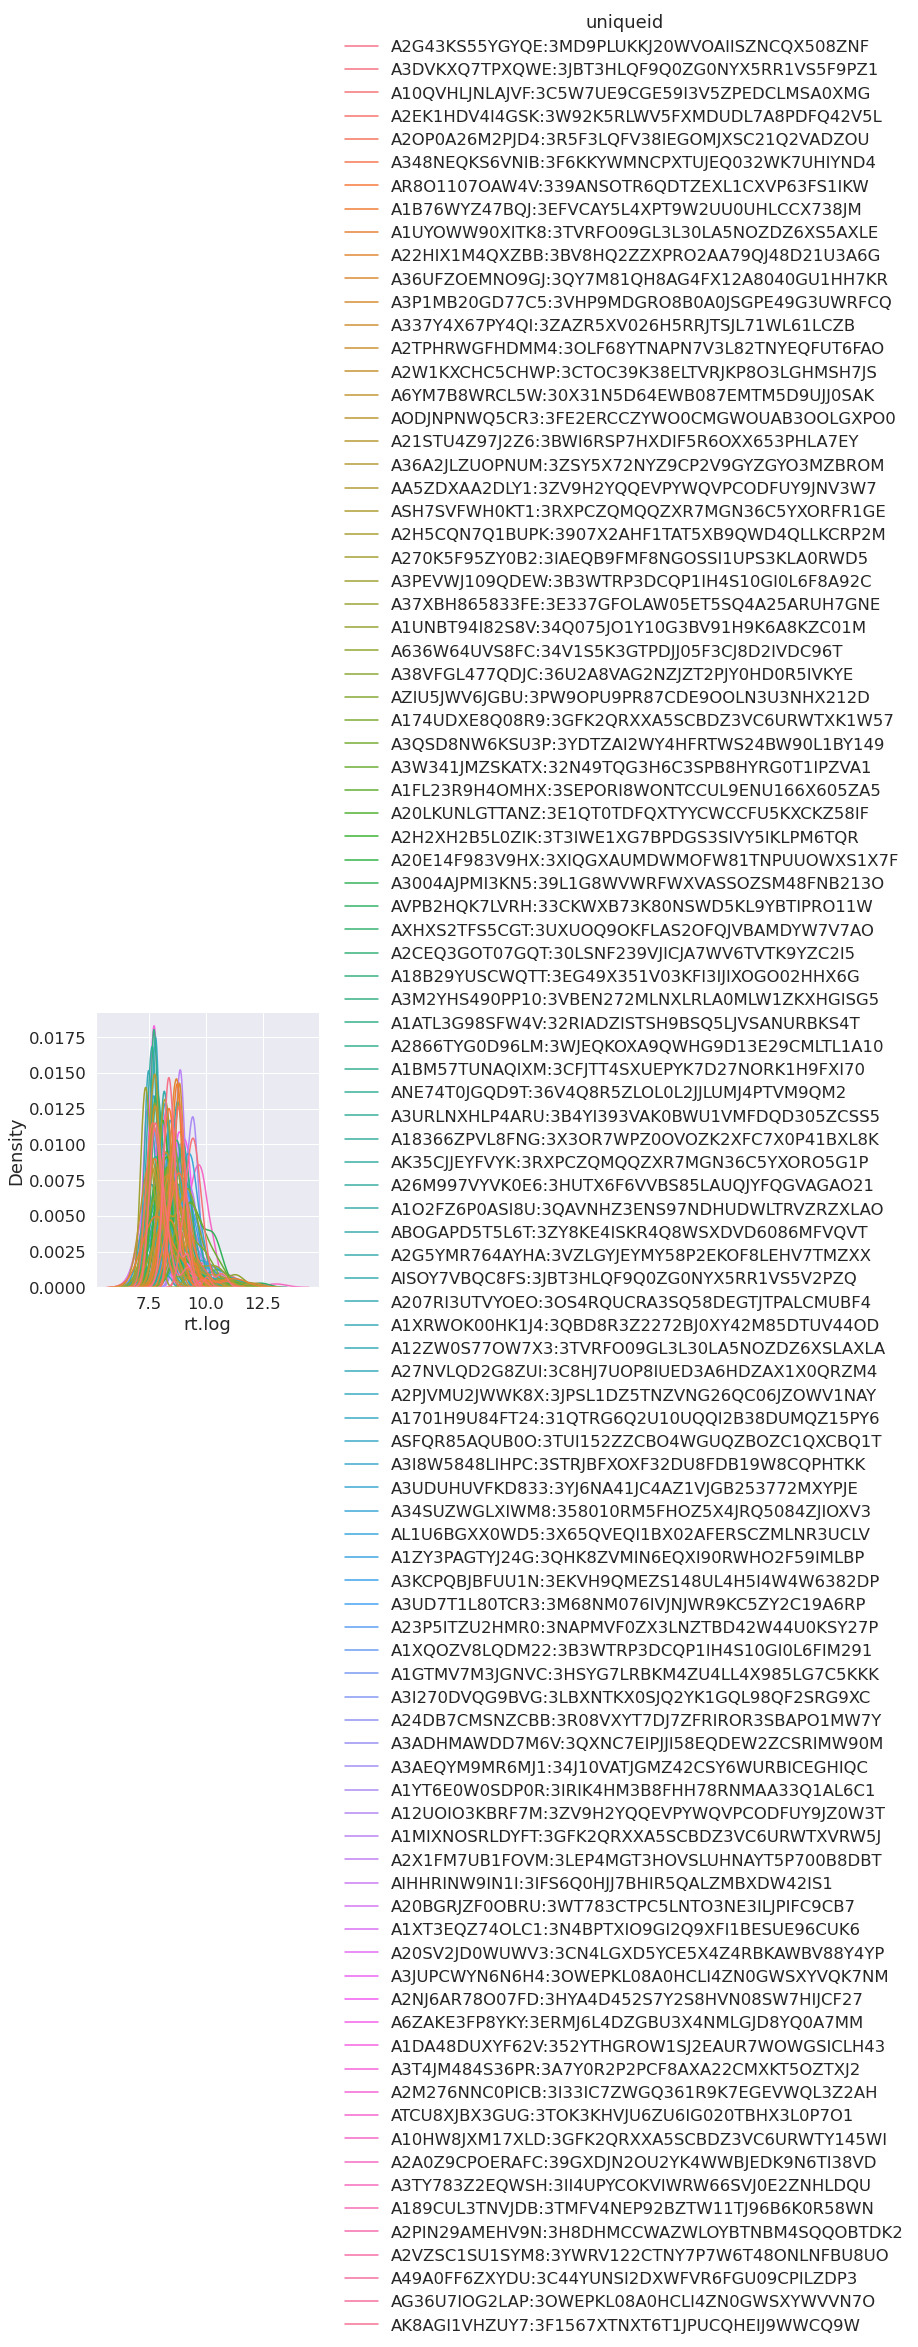

In [23]:
response_df["rt.log"] = np.log(response_df.rt)
sns.displot(data=response_df, x="rt.log", hue="uniqueid", kind="kde")

In [24]:
# sns.lmplot(data=response_df.reset_index(), x="trial_index", y="rt.log", hue="uniqueid", height=10, ci=False)
# plt.title("Log response time vs. trial position")

### How are people using the sliders?

- Stripplot points correspond to individual slider responses.
- Responses are grouped vertically by subject.
- Transparent boxplots indicate filler response value for a particular subject. Red median lines / boxes indicate "full" fillers and blue indicate "empty."
- X marks indicate mean practice response value for a particular subject. Red and blue match above.

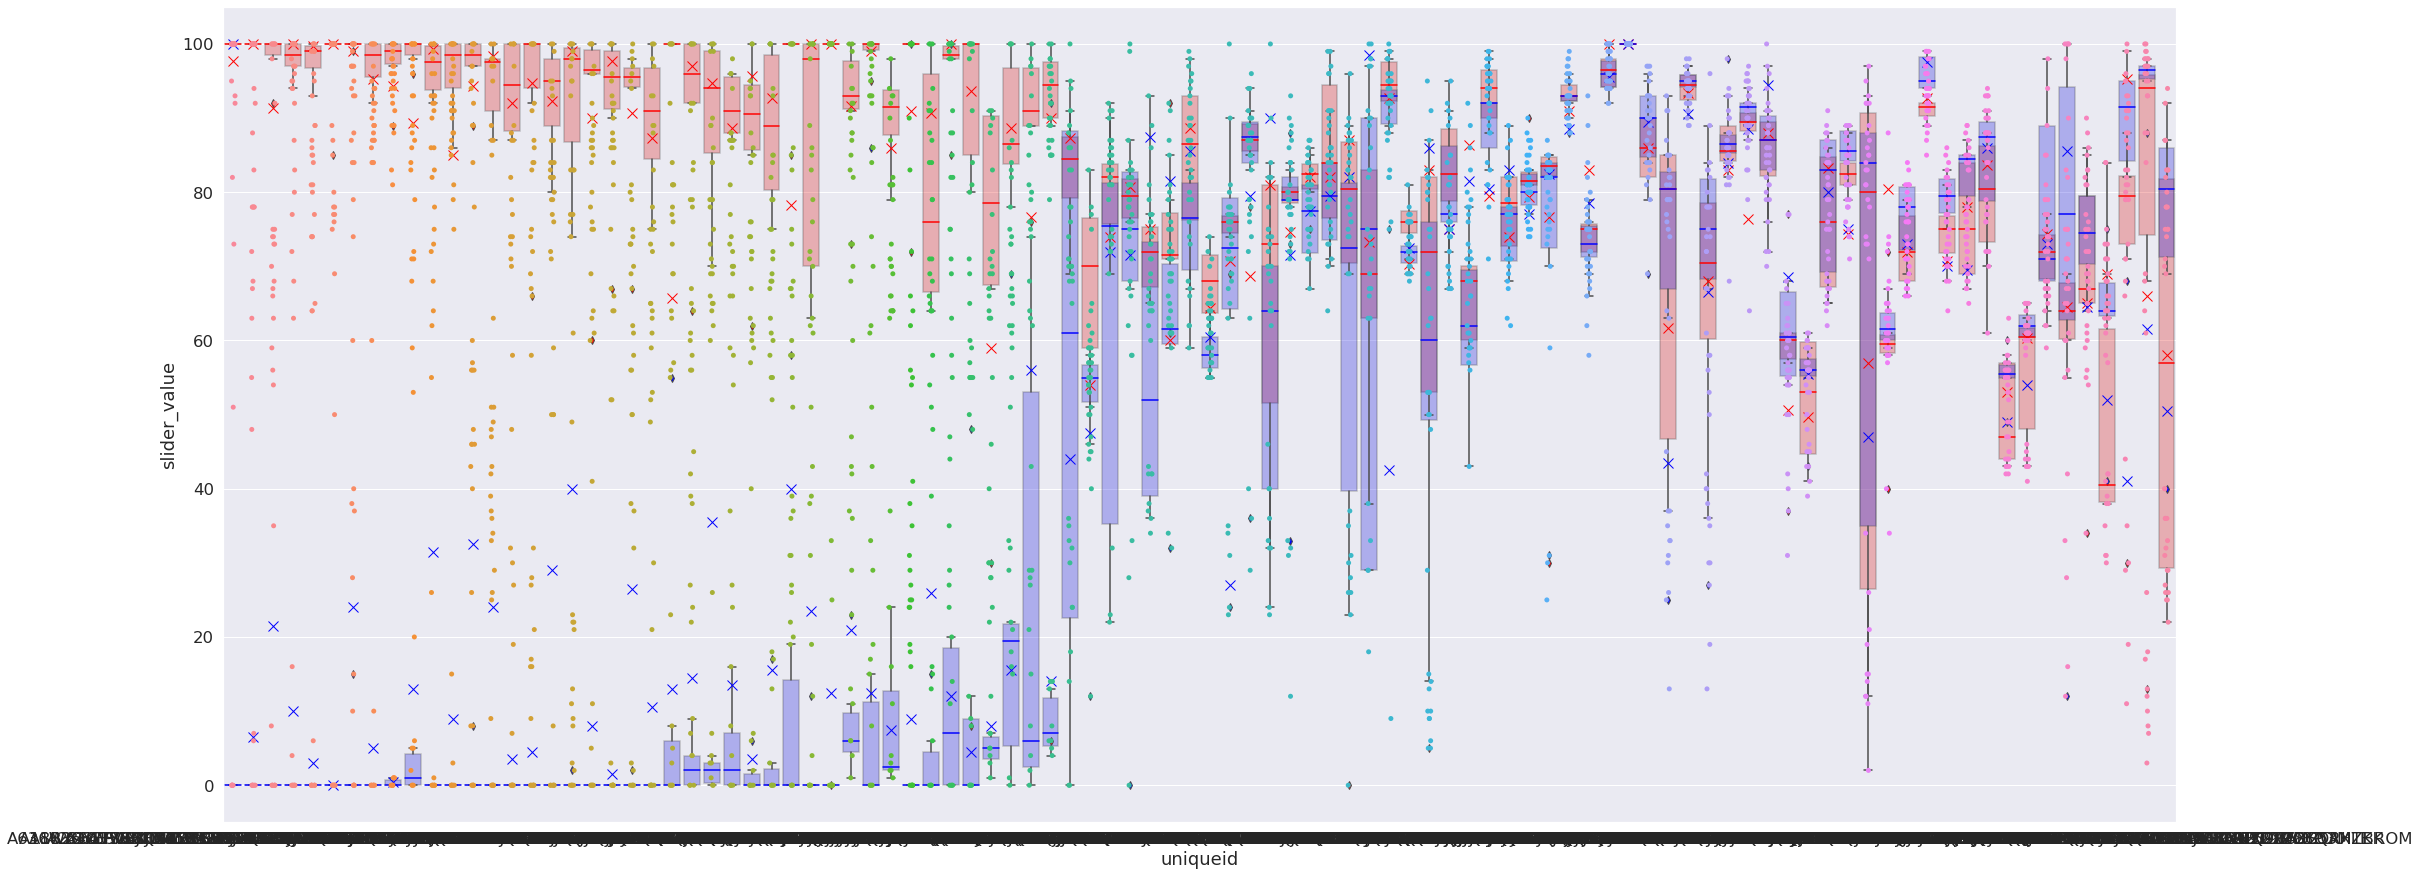

In [25]:
# Order S by descending difference between mean full-filler and empty-filler rating
filler_rows = response_df[response_df.condition_0 == "filler"]
filler_diffs = filler_rows.groupby("uniqueid").apply(lambda xs: xs[xs.condition_1 == "full"].slider_value.mean() - xs[xs.condition_1 == "empty"].slider_value.mean())
subject_order = filler_diffs.sort_values(ascending=False).index

plt.subplots(figsize=(35, 15))
g = sns.stripplot(data=response_df.reset_index(), x="uniqueid", y="slider_value", order=subject_order)

# plot filler responses
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "full")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order,
            color="red", medianprops=dict(color="red"), flierprops=dict(markerfacecolor="red"), boxprops=dict(alpha=0.3))
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "empty")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order, 
            color="blue", medianprops=dict(color="blue"), flierprops=dict(markerfacecolor="blue"), boxprops=dict(alpha=0.3))

# plot practice responses
practice_full, practice_empty = [], []
for i, subj in enumerate(subject_order):
    subj_rows = response_df.xs(subj, level="uniqueid")
    subj_rows = subj_rows[(subj_rows.condition_0 == "practice")]
    practice_full.append(subj_rows[subj_rows.condition_2 == "full"].slider_value.mean())
    practice_empty.append(subj_rows[subj_rows.condition_2 == "empty"].slider_value.mean())
    
g.plot(np.arange(len(subject_order)), practice_full, marker="x", markersize=10, color="red", linestyle="none")
g.plot(np.arange(len(subject_order)), practice_empty, marker="x", markersize=10, color="blue", linestyle="none")

## Attention checks

### Practice round

In [26]:
practice_df = response_df[response_df.condition_0 == "practice"]
practice_df["match"] = practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
practice_df["practice_id"] = practice_df.condition_1.str.cat(practice_df.condition_2)

/tmp/ipykernel_275/3679604798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_df["match"] = practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
/tmp/ipykernel_275/3679604798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_df["practice_id"] = practice_df.condition_1.str.cat(practice_df.condition_2)


In [27]:
# Ignore evaluating practice items which retrospectively don't seem like good practice items...
PRACTICE_IGNORE = {"solidempty", "abstractempty"}

practice_df = practice_df[~practice_df.practice_id.isin(PRACTICE_IGNORE)]

#### Practice failures by item

In [28]:
practice_df.groupby("practice_id").match.mean()

practice_id
abstractfull    0.909091
liquidfull      0.909091
solidfull       0.909091
Name: match, dtype: float64

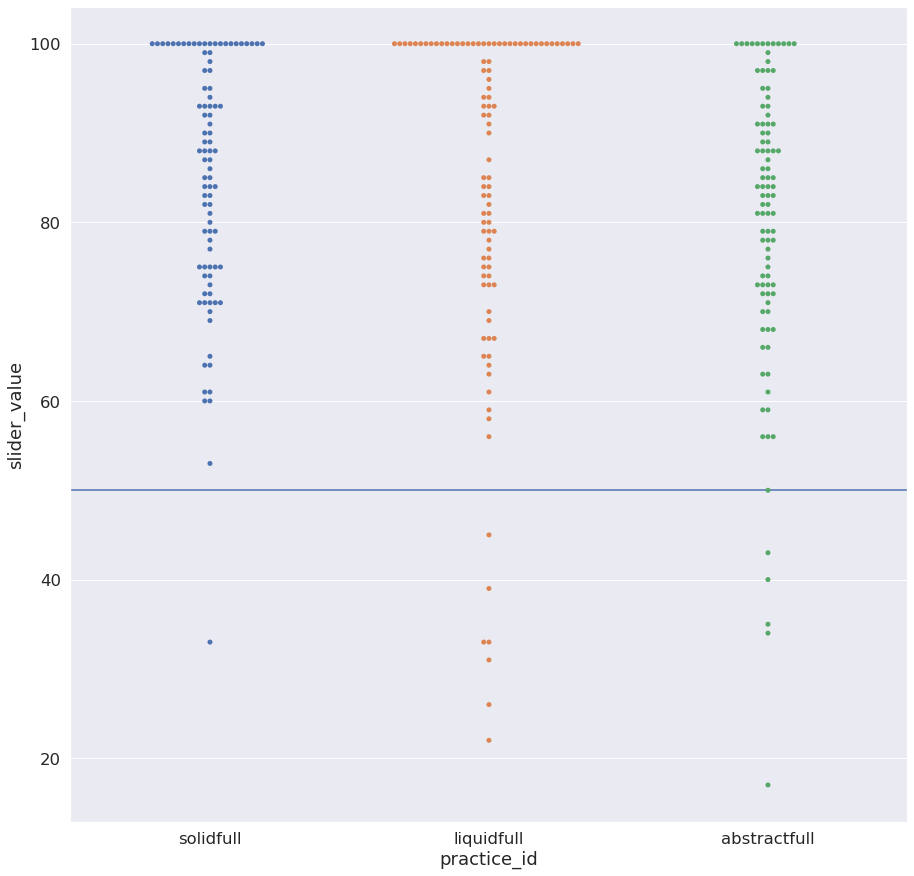

In [29]:
plt.subplots(figsize=(15,15))
sns.swarmplot(data=practice_df.reset_index(), x="practice_id", y="slider_value")
plt.axhline(50)

#### Practice copouts

In [30]:
practice_df.groupby("practice_id").slider_copout.agg(["mean", "count"]).sort_values("mean", ascending=False)

,mean,count
practice_id,,
solidfull,0.080808,99
abstractfull,0.030303,99
liquidfull,0.020202,99


### Fillers

<AxesSubplot:xlabel='t'>

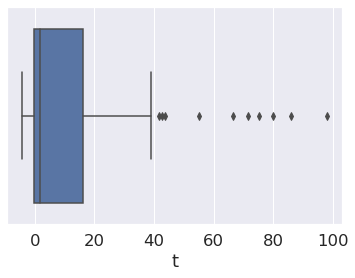

In [31]:
from scipy.stats import ttest_ind
def compute_filler_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" filler items
    """
    filler_rows = subj_rows[subj_rows.condition_0 == "filler"]
    
    # Filter out copouts (and print warning -- fillers should not trigger copout)
    copout_rows = filler_rows[filler_rows.slider_copout]
    if len(copout_rows) > 0:
        print(f"WARNING: subject {filler_rows.iloc[0].name} had {len(copout_rows)} filler copout(s). Seems fishy.")
    filler_rows = filler_rows[~filler_rows.slider_copout]
    
    full_filler = filler_rows[filler_rows.condition_1 == "full"]
    empty_filler = filler_rows[filler_rows.condition_1 == "empty"]
    
    return pd.Series(ttest_ind(full_filler.slider_value, empty_filler.slider_value),
                     index=["t", "pval"])

filler_stats = response_df.groupby("uniqueid").apply(compute_filler_ttest)
sns.boxplot(data=filler_stats.reset_index(), x="t", hue="uniqueid")

In [32]:
filler_stats.sort_values("t").head(50)

,t,pval
uniqueid,,
A1O2FZ6P0ASI8U:3QAVNHZ3ENS97NDHUDWLTRVZRZXLAO,-4.142857,0.002003
AODJNPNWQ5CR3:3FE2ERCCZYWO0CMGWOUAB3OOLGXPO0,-2.127527,0.059268
A3PEVWJ109QDEW:3B3WTRP3DCQP1IH4S10GI0L6F8A92C,-1.705606,0.118894
ASH7SVFWH0KT1:3RXPCZQMQQZXR7MGN36C5YXORFR1GE,-1.661811,0.130916
A1UYOWW90XITK8:3TVRFO09GL3L30LA5NOZDZ6XS5AXLE,-1.644068,0.131190
A1GTMV7M3JGNVC:3HSYG7LRBKM4ZU4LL4X985LG7C5KKK,-1.566305,0.148346
A20BGRJZF0OBRU:3WT783CTPC5LNTO3NE3ILJPIFC9CB7,-1.514456,0.160858
A3I8W5848LIHPC:3STRJBFXOXF32DU8FDB19W8CQPHTKK,-1.331468,0.212589
A36A2JLZUOPNUM:3ZSY5X72NYZ9CP2V9GYZGYO3MZBROM,-1.330296,0.212961


#### Filler copouts

In [33]:
response_df[response_df.condition_0 == "filler"].groupby(["item_id", "condition_1"]).slider_copout.agg(["mean", "sum", "count"]).sort_values("mean", ascending=False)

,,mean,sum,count
item_id,condition_1,,,
9.0,full,0.040404,4,99
7.0,full,0.030303,3,99
2.0,empty,0.020202,2,99
3.0,empty,0.020202,2,99
6.0,full,0.020202,2,99
0.0,empty,0.010101,1,99
1.0,empty,0.010101,1,99
4.0,empty,0.010101,1,99
5.0,empty,0.010101,1,99


#### Filler failures by item

In [34]:
filler_df = response_df[response_df.condition_0 == "filler"]
filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)

/tmp/ipykernel_275/2652486730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)


In [35]:
filler_df.groupby(["condition_1", "item_id"]).match.mean()

condition_1  item_id
empty        0.0        0.505051
             1.0        0.414141
             2.0        0.464646
             3.0        0.464646
             4.0        0.454545
             5.0        0.484848
full         6.0        0.898990
             7.0        0.888889
             8.0        0.949495
             9.0        0.878788
             10.0       0.959596
             11.0       0.929293
Name: match, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


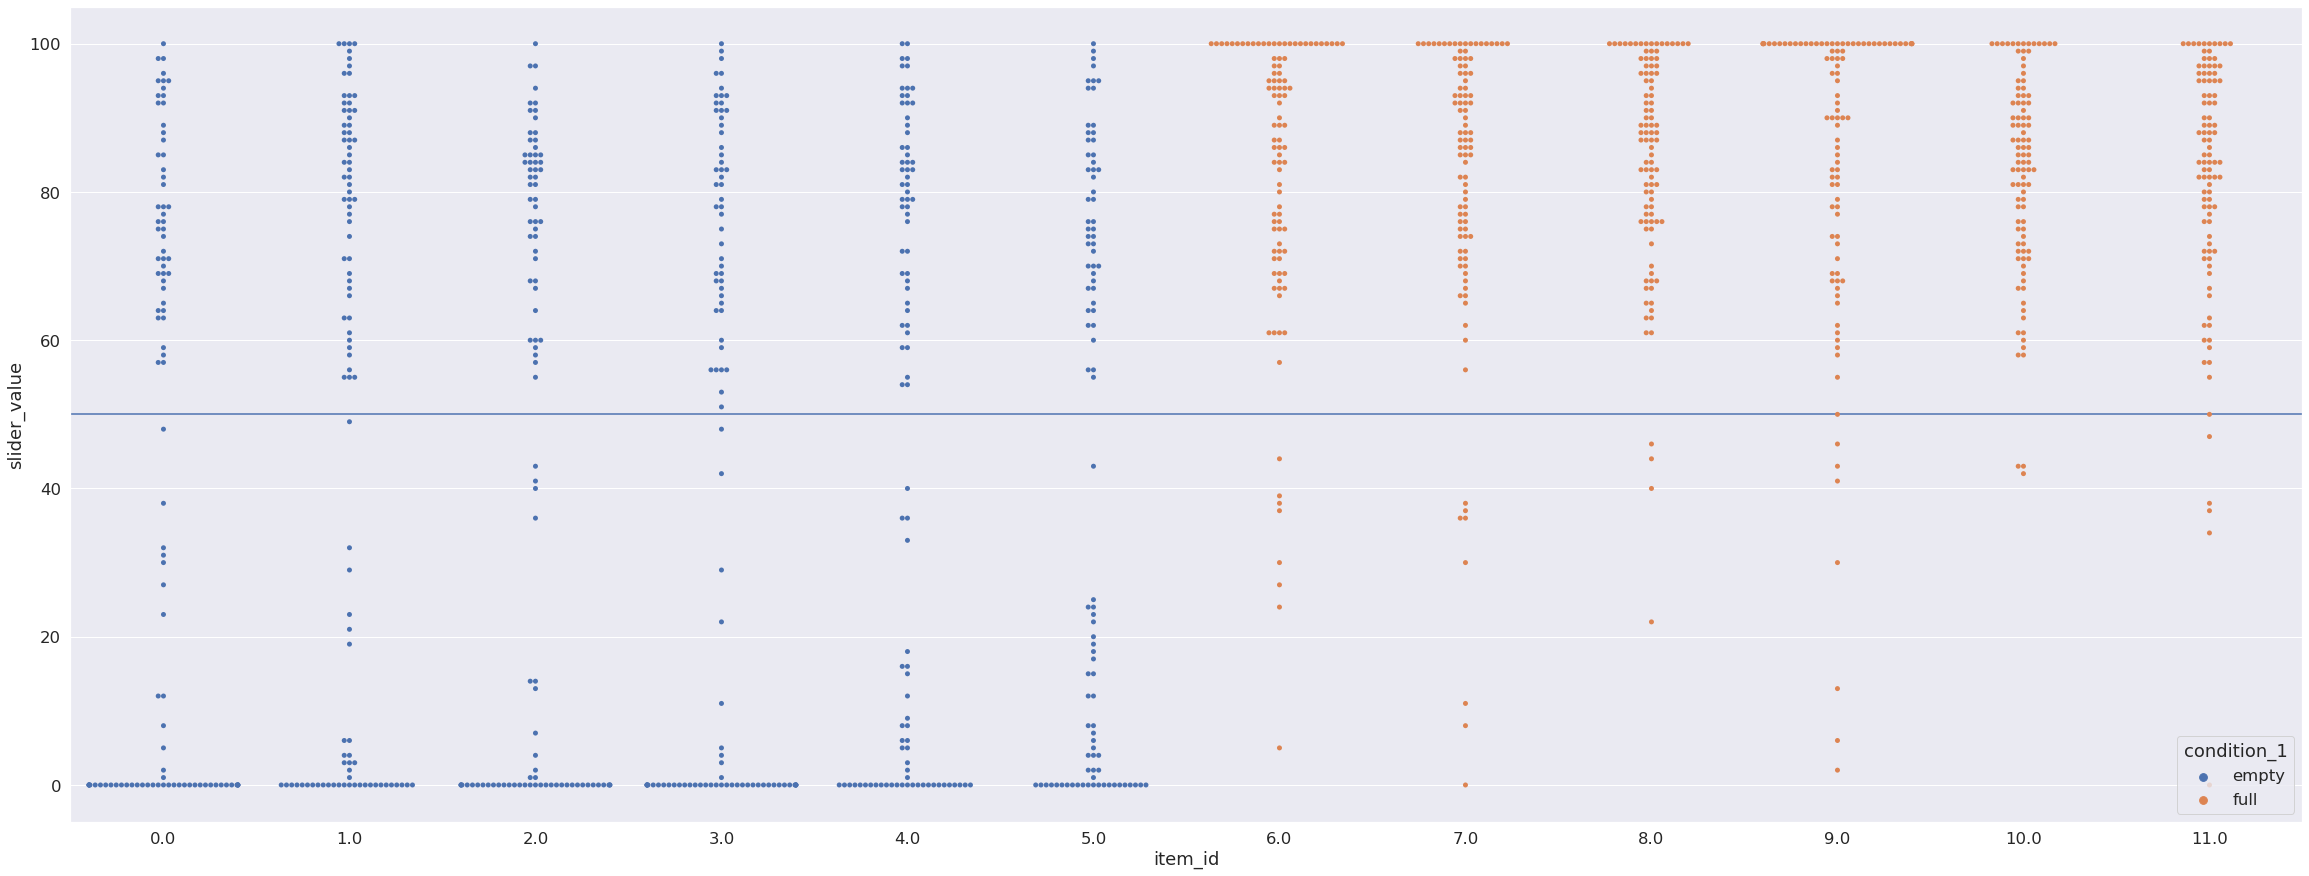

In [36]:
plt.subplots(figsize=(40,15))
# sns.barplot(data=filler_df.reset_index(), x="condition_1", hue="item_id", y="slider_value")
sns.swarmplot(data=filler_df.reset_index(), hue="condition_1", x="item_id", y="slider_value")
plt.axhline(50)

## Final data processing

In [37]:
exp_items = response_df[~(response_df.condition_0.isin(("practice", "filler")))]

### Filter based on practice and attention checks

In [38]:
practice_drops = set(practice_df.groupby("uniqueid").filter(lambda r: r.match.mean() < 0.66).index.get_level_values("uniqueid"))
drop_pct = np.round(len(practice_drops) / N * 100, 1)
print(f"{len(practice_drops)} subjects ({drop_pct}%) disqualified and dropped due to failed practice.")
print("\t" + "\n\t".join(practice_drops))
exp_items = exp_items.drop(practice_drops, level="uniqueid")

attention_drops = filler_stats[(filler_stats.t < 0) | (filler_stats.pval > 1e-1) | filler_stats.t.isna()]
drop_pct = np.round(len(attention_drops) / N * 100, 1)
print(f"{len(attention_drops)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(attention_drops.index))
exp_items = exp_items.drop(attention_drops.index, level="uniqueid")

4 subjects (4.0%) disqualified and dropped due to failed practice.
	A1701H9U84FT24:31QTRG6Q2U10UQQI2B38DUMQZ15PY6
	ASFQR85AQUB0O:3TUI152ZZCBO4WGUQZBOZC1QXCBQ1T
	A2PIN29AMEHV9N:3H8DHMCCWAZWLOYBTNBM4SQQOBTDK2
	A2H5CQN7Q1BUPK:3907X2AHF1TAT5XB9QWD4QLLKCRP2M
54 subjects (54.5%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.
	A12ZW0S77OW7X3:3TVRFO09GL3L30LA5NOZDZ6XSLAXLA
	A1701H9U84FT24:31QTRG6Q2U10UQQI2B38DUMQZ15PY6
	A174UDXE8Q08R9:3GFK2QRXXA5SCBDZ3VC6URWTXK1W57
	A189CUL3TNVJDB:3TMFV4NEP92BZTW11TJ96B6K0R58WN
	A1FL23R9H4OMHX:3SEPORI8WONTCCUL9ENU166X605ZA5
	A1GTMV7M3JGNVC:3HSYG7LRBKM4ZU4LL4X985LG7C5KKK
	A1O2FZ6P0ASI8U:3QAVNHZ3ENS97NDHUDWLTRVZRZXLAO
	A1UYOWW90XITK8:3TVRFO09GL3L30LA5NOZDZ6XS5AXLE
	A1XQOZV8LQDM22:3B3WTRP3DCQP1IH4S10GI0L6FIM291
	A1XT3EQZ74OLC1:3N4BPTXIO9GI2Q9XFI1BESUE96CUK6
	A1ZY3PAGTYJ24G:3QHK8ZVMIN6EQXI90RWHO2F59IMLBP
	A207RI3UTVYOEO:3OS4RQUCRA3SQ58DEGTJTPALCMUBF4
	A20BGRJZF0OBRU:3WT783CTPC5LNTO3NE3ILJPIFC9CB7
	A20LKUNLGTTANZ:3E1QT0

In [39]:
print(f"{len(set(exp_items.index.get_level_values('uniqueid')))} subjects remaining.")

45 subjects remaining.


### Merge in materials

In [40]:
import json
def load_materials(mat):
    with open(f"../../materials/{mat}.json") as f:
        materials = json.load(f)
    return pd.DataFrame.from_records(materials["items"]).rename(columns={"id": "item_id"}).set_index("item_id")

materials_ids = sorted(set(exp_items.materials_id))
materials_df = pd.concat([load_materials(mat) for mat in materials_ids], names=["materials_id"], keys=materials_ids, axis=0)

materials_df["AV"] = materials_df.A.str.cat(materials_df.V, " ")

# NB this doesn't handle fillers correctly

In [41]:
keep_cols = ["A", "V", "L", "AV", "A concrete?", "A countable?", "A animate?",
             "non alternating given A", "non alternating given A.P", "non alternating given L", "non alternating given L.det"]
merged_df = pd.merge(exp_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)

### Filter out items which were dropped in later materials iterations

In [42]:
# Partition results into those evaluated on latest materials vs. earlier
latest_materials = materials_ids[-1]
latest_merged_df = merged_df[merged_df.materials_id == latest_materials]
earlier_merged_df = merged_df[merged_df.materials_id != latest_materials]

# Get item IDs which appear only in earlier
early_only = set(earlier_merged_df.item_id) - set(latest_merged_df.item_id)

print(f"Dropping {len(early_only)} item results because they weren't included in the latest materials, {materials_ids[-1]}.")
merged_df = merged_df[~merged_df.item_id.isin(early_only)]

Dropping 0 item results because they weren't included in the latest materials, swarm-006-nonalternating-natural.


### Separate control items from critical items

In [43]:
merged_df_critical = merged_df[~merged_df.is_nonalternating_control]
merged_df_control = merged_df[merged_df.is_nonalternating_control]

### Export

In [44]:
merged_df.to_csv("merged_df.csv")

## Basic visualization: construction meaning

In [45]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("agent_is_subject")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    agent_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - agent_rows.slider_value_normed.mean()

item_differences = merged_df_critical.groupby(["item_id", "A", "V", "L", "A concrete?", "A countable?", "A animate?"]) \
    .apply(compute_item_difference) \
    .rename("LocationSubject - AgentSubject")

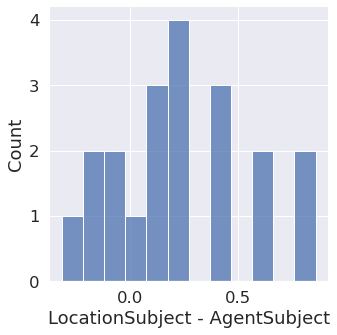

In [46]:
sns.displot(item_differences, bins=12)

In [47]:
item_differences.sort_values(ascending=False)

item_id  A             V        L             A concrete?  A countable?  A animate?
64.0     worms         wriggl   bucket        True         True          True          0.864151
17.0     debris        flow     river         True         False         False         0.769596
2.0      ants          crawl    table         True         True          True          0.606300
6.0      terror        cours    body          False        False         False         0.579550
56.0     tadpoles      swimm    pond          True         True          True          0.436863
19.0     bubbles       foam     tub           True         True          False         0.392286
22.0     lights        glow     sky           True         True          False         0.375897
24.0     frogs         hopp     swamp         True         True          True          0.270760
41.0     trepidation   shak     chest         False        False         False         0.224466
3.0      trumpets      ring     concert hall  True  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'debris flow'),
  Text(1, 0, 'sewage runn'),
  Text(2, 0, 'frogs hopp'),
  Text(3, 0, 'excitement puls'),
  Text(4, 0, 'tadpoles swimm'),
  Text(5, 0, 'excitement crackl'),
  Text(6, 0, 'ants crawl'),
  Text(7, 0, 'people bustl'),
  Text(8, 0, 'cockroaches creep'),
  Text(9, 0, 'anticipation tingl'),
  Text(10, 0, 'fear prickl'),
  Text(11, 0, 'worms wriggl'),
  Text(12, 0, 'trumpets ring'),
  Text(13, 0, 'bubbles foam'),
  Text(14, 0, 'lights glow'),
  Text(15, 0, 'fireflies glimmer'),
  Text(16, 0, 'trepidation shak'),
  Text(17, 0, 'energy humm'),
  Text(18, 0, 'bees swarm'),
  Text(19, 0, 'terror cours')])

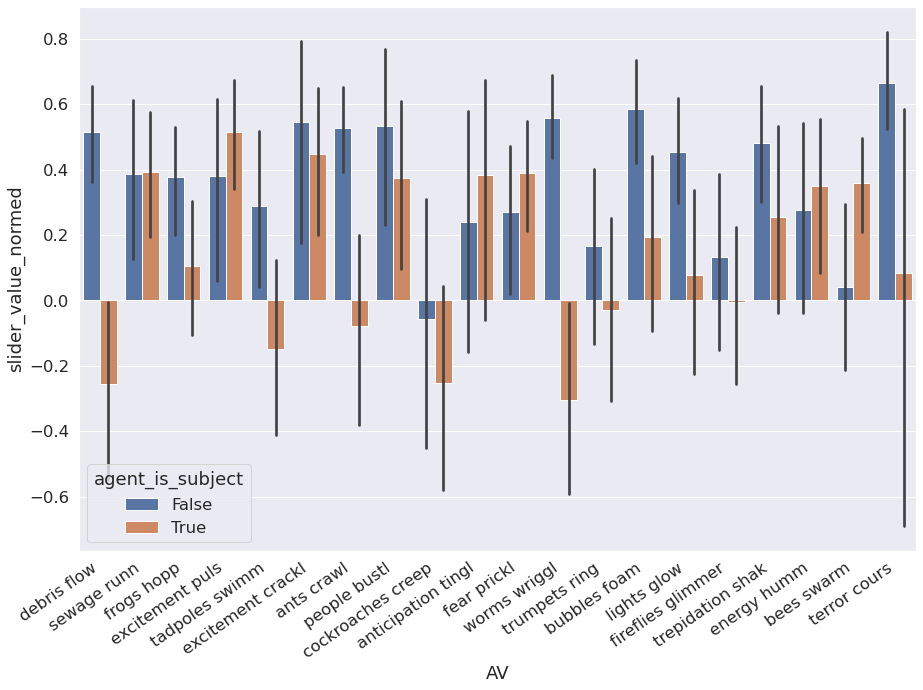

In [48]:
plt.subplots(figsize=(15, 10))
sns.barplot(data=merged_df_critical.reset_index(), x="AV", hue="agent_is_subject", y="slider_value_normed")
plt.xticks(rotation=35, ha="right")

<AxesSubplot:xlabel='A concrete?', ylabel='LocationSubject - AgentSubject'>

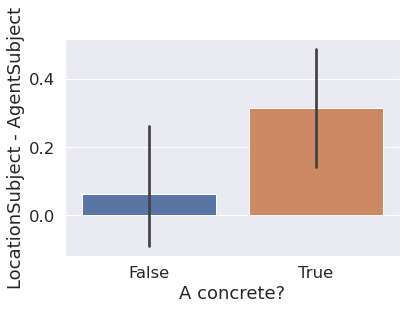

In [49]:
sns.barplot(data=item_differences.reset_index(), x="A concrete?", y="LocationSubject - AgentSubject")

<AxesSubplot:xlabel='A countable?', ylabel='LocationSubject - AgentSubject'>

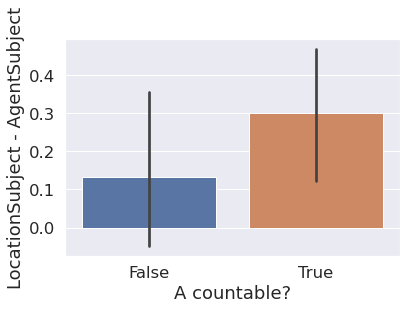

In [50]:
sns.barplot(data=item_differences.reset_index(), x="A countable?", y="LocationSubject - AgentSubject")

<AxesSubplot:xlabel='A animate?', ylabel='LocationSubject - AgentSubject'>

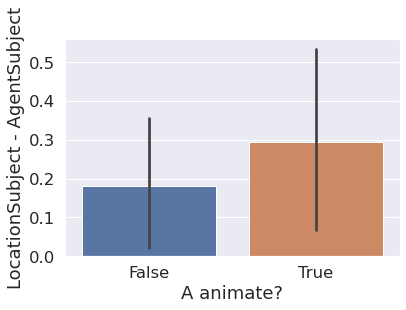

In [51]:
sns.barplot(data=item_differences.reset_index(), x="A animate?", y="LocationSubject - AgentSubject")

### Copouts

In [52]:
copouts = merged_df.groupby(["materials_id", "item_id"]).apply(lambda subj_rows: subj_rows.slider_copout.astype(bool).mean())

In [53]:
copouts = merged_df.groupby(["materials_id", "item_id", "agent_is_given", "agent_is_subject", "is_nonalternating_control"] + keep_cols) \
    .apply(lambda rows: rows.slider_copout.astype(bool).agg(["sum", "count"]))
copouts = copouts.groupby(["item_id", "agent_is_given", "agent_is_subject", "is_nonalternating_control"]).sum()
copouts["mean"] = copouts["sum"].div(copouts["count"])
copouts.sort_values("mean", ascending=False)

slider_copout                                                      sum  count  \
item_id agent_is_given agent_is_subject is_nonalternating_control               
58.0    False          True             False                        1      4   
6.0     False          True             False                        1      4   
31.0    False          False            False                        1      6   
58.0    False          False            False                        1      7   
6.0     False          False            False                        1      8   
        True           False            False                        1      8   
31.0    True           True             False                        1     10   
41.0    False          False            False                        0      6   
58.0    True           False            False                        0      4   
41.0    True           True             False                        0     12   
                       False            False                        0      6   
        False          True             False                        0      3   
31.0    True           False            False                        0      7   
        False          True             False                        0      9   
7.0     True           True             False                        0      9   
                       False            False                        0      5   
        False          True             False                        0      7   
                       False            False                        0     10   
6.0     True           True             False                        0      2   
58.0    True           True             False                        0      5   

slider_copout                                                          mean  
item_id agent_is_given agent_is_subject is_nonalternating_control            
58.0    False          True             False                      0.250000  
6.0     False          True             False                      0.250000  
31.0    False          False            False                      0.166667  
58.0    False          False            False                      0.142857  
6.0     False          False            False                      0.125000  
        True           False            False                      0.125000  
31.0    True           True             False                      0.100000  
41.0    False          False            False                      0.000000  
58.0    True           False            False                      0.000000  
41.0    True           True             False                      0.000000  
                       False            False                      0.000000  
        False          True             False                      0.000000  
31.0    True           False            False                      0.000000  
        False          True             False                      0.000000  
7.0     True           True             False                      0.000000  
                       False            False                      0.000000  
        False          True             False                      0.000000  
                       False            False                      0.000000  
6.0     True           True             False                      0.000000  
58.0    True           True             False                      0.000000

<AxesSubplot:xlabel='A', ylabel='slider_copout'>

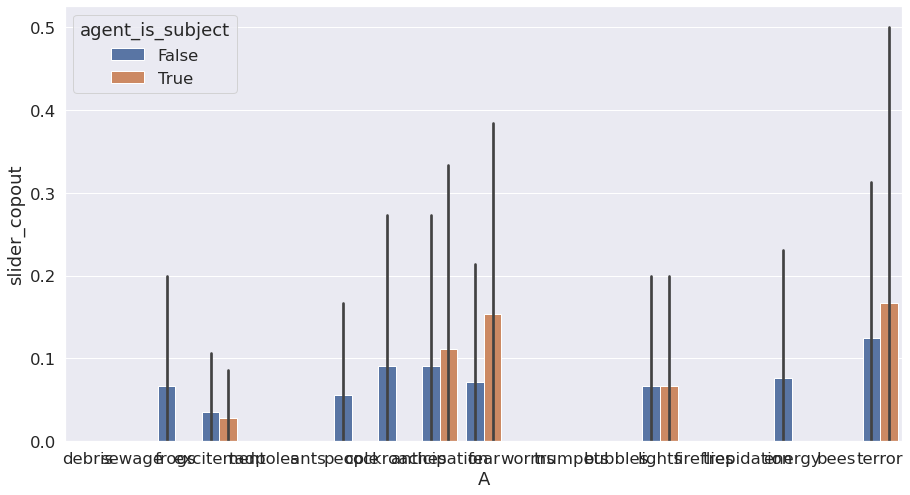

In [54]:
plt.subplots(figsize=(15, 8))
sns.barplot(data=merged_df_critical, x="A", y="slider_copout", hue="agent_is_subject")

<AxesSubplot:xlabel='A concrete?', ylabel='slider_copout'>

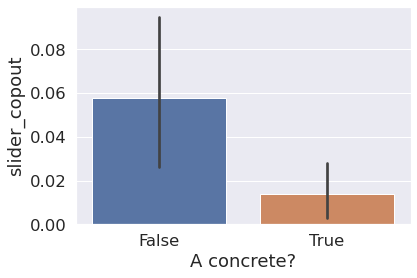

In [55]:
sns.barplot(data=merged_df_critical, x="A concrete?", y="slider_copout")

<AxesSubplot:xlabel='A countable?', ylabel='slider_copout'>

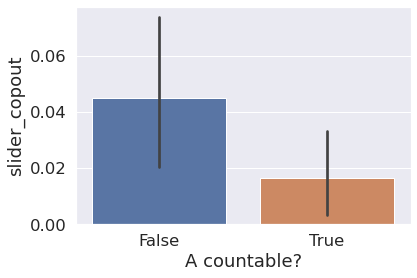

In [56]:
sns.barplot(data=merged_df_critical, x="A countable?", y="slider_copout")

## Item exposure

In [57]:
merged_df.groupby(["item_id", "A", "agent_is_given", "agent_is_subject", "is_nonalternating_control"]).size().sort_values().head(50)

item_id  A             agent_is_given  agent_is_subject  is_nonalternating_control
8.0      cockroaches   True            False             False                        2
56.0     tadpoles      True            False             False                        2
6.0      terror        True            True              False                        2
0.0      bees          True            False             False                        3
41.0     trepidation   False           True              False                        3
17.0     debris        True            True              False                        3
0.0      bees          True            True              False                        4
58.0     anticipation  True            False             False                        4
                       False           True              False                        4
39.0     sewage        False           True              False                        4
8.0      cockroaches   True          

## Basic visualization: givenness manipulation

In [58]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("agent_is_subject")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    agent_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - agent_rows.slider_value_normed.mean()

item_differences = merged_df_critical.groupby(["item_id", "A", "V", "L", "AV", "A concrete?", "A countable?", "agent_is_given"]) \
    .apply(compute_item_difference) \
    .rename("LocationSubject - AgentSubject")

In [59]:
item_differences.sort_values()

item_id  A             V        L             AV                  A concrete?  A countable?  agent_is_given
0.0      bees          swarm    garden        bees swarm          True         True          False            -0.344005
25.0     energy        humm     market        energy humm         False        False         True             -0.337019
58.0     anticipation  tingl    arms          anticipation tingl  False        False         False            -0.294143
31.0     excitement    puls     temples       excitement puls     False        False         False            -0.284778
30.0     fear          prickl   fingertips    fear prickl         False        False         False            -0.266588
0.0      bees          swarm    garden        bees swarm          True         True          True             -0.243093
39.0     sewage        runn     street        sewage runn         True         False         False            -0.089723
58.0     anticipation  tingl    arms          antici

<AxesSubplot:xlabel='agent_is_given', ylabel='LocationSubject - AgentSubject'>

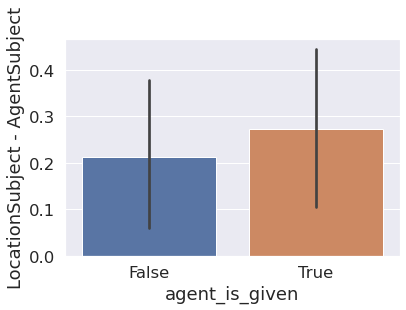

In [60]:
sns.barplot(data=item_differences.reset_index(), x="agent_is_given", y="LocationSubject - AgentSubject")

<AxesSubplot:xlabel='agent_is_subject', ylabel='slider_value_normed'>

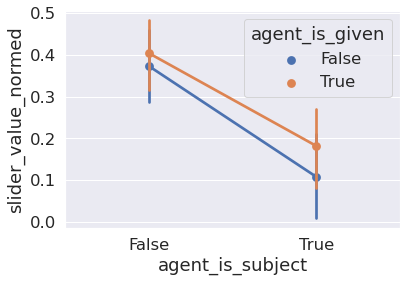

In [61]:
sns.pointplot(data=merged_df_critical.reset_index(), x="agent_is_subject", y="slider_value_normed", hue="agent_is_given")

<AxesSubplot:xlabel='Construction', ylabel='Normalized slider response'>

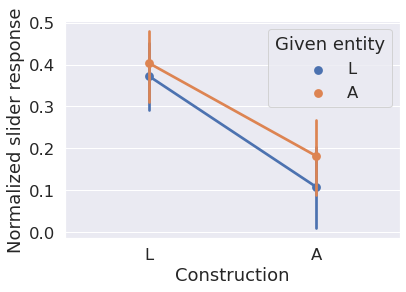

In [62]:
to_plot = merged_df_critical.copy()
to_plot["Construction"] = to_plot.agent_is_subject.map({False: "L", True: "A"})
to_plot["Given entity"] = to_plot.agent_is_given.map({False: "L", True: "A"})
to_plot["Normalized slider response"] = to_plot.slider_value_normed
sns.pointplot(data=to_plot.reset_index(), x="Construction", y="Normalized slider response", hue="Given entity")

<AxesSubplot:xlabel='agent_is_subject', ylabel='slider_value_normed'>

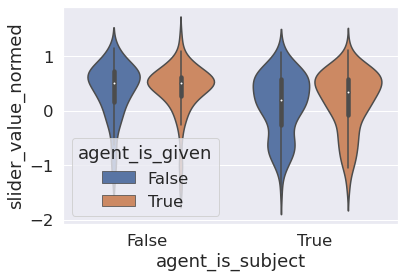

In [63]:
sns.violinplot(data=merged_df_critical.reset_index(), x="agent_is_subject", y="slider_value_normed", hue="agent_is_given")

In [64]:
merged_df_critical.groupby(["agent_is_subject", "agent_is_given"]).slider_value_normed.agg(["mean", "std"])

mean       std
agent_is_subject agent_is_given                    
False            False           0.372806  0.504423
                 True            0.403709  0.451473
True             False           0.108113  0.561332
                 True            0.181937  0.547277

In [65]:
merged_df_critical.groupby(["agent_is_subject", "agent_is_given"]).slider_value.agg(["mean", "std", "sem"])

mean        std       sem
agent_is_subject agent_is_given                                
False            False           75.388889  19.185189  1.598766
                 True            77.844262  18.133126  1.641696
True             False           65.328000  23.372432  2.090494
                 True            68.683453  22.449310  1.904126

### Split by concreteness

<AxesSubplot:xlabel='A concrete?', ylabel='LocationSubject - AgentSubject'>

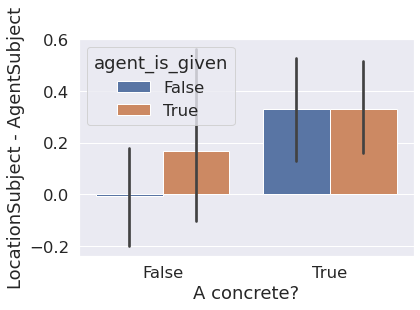

In [66]:
sns.barplot(data=item_differences.reset_index(), x="A concrete?", y="LocationSubject - AgentSubject", hue="agent_is_given")

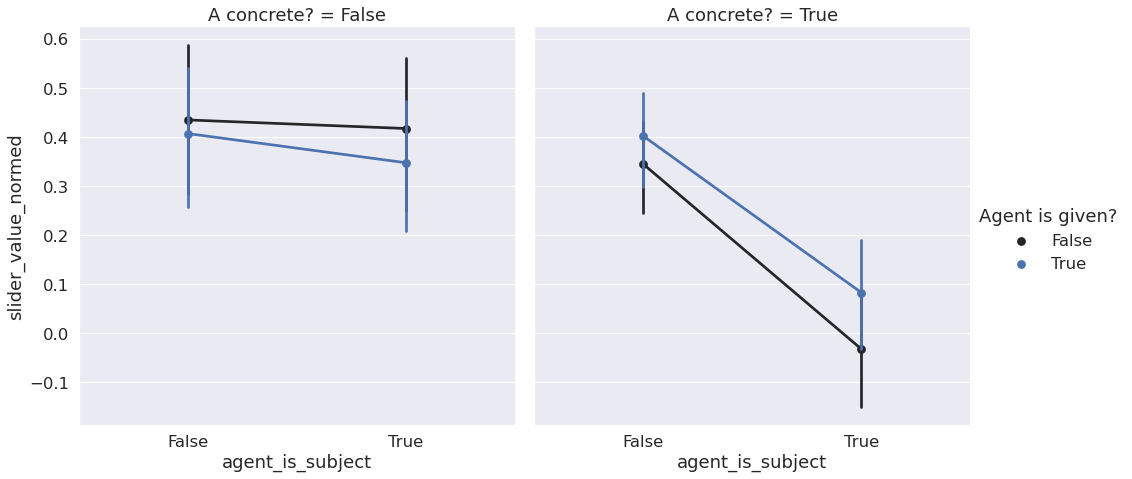

In [67]:
g = sns.FacetGrid(data=merged_df_critical.reset_index(), col="A concrete?", height=7)
g.map(sns.pointplot, "agent_is_subject", "slider_value_normed", "agent_is_given", order=[False, True], hue_order=[False, True]).add_legend(title="Agent is given?")

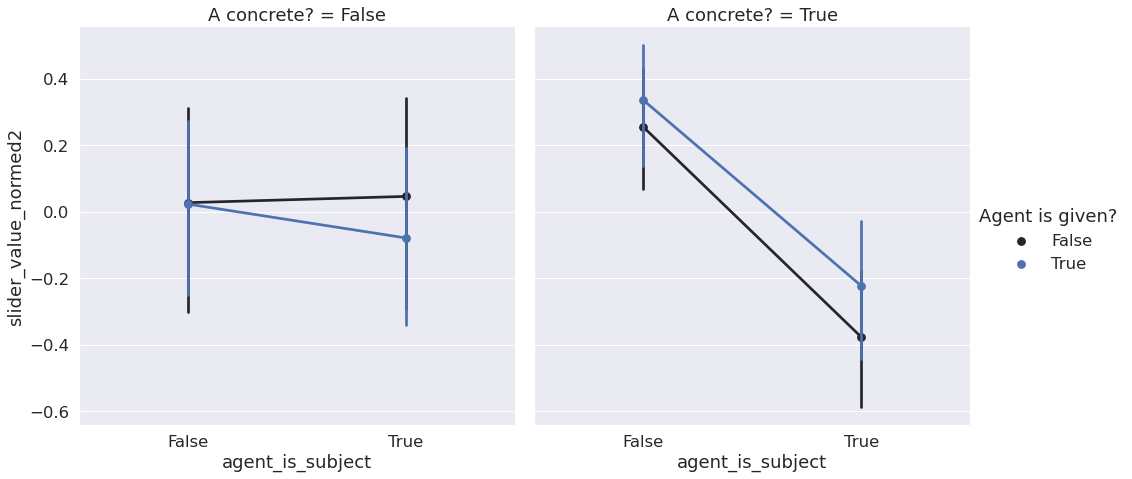

In [68]:
graphdf = merged_df_critical.copy()
graphdf["slider_value_normed2"] = graphdf.groupby('item_id').slider_value_normed.transform(lambda xs: (xs - xs.mean()) / xs.std())
g = sns.FacetGrid(data=graphdf.reset_index(), col="A concrete?", height=7)
g.map(sns.pointplot, "agent_is_subject", "slider_value_normed2", "agent_is_given", order=[False, True], hue_order=[False, True]).add_legend(title="Agent is given?")

In [69]:
merged_df_critical.groupby("A concrete?").apply(
    lambda rows: ttest_ind(rows[rows.agent_is_given & ~rows.agent_is_subject & ~rows.slider_copout].slider_value_normed,
                           rows[~rows.agent_is_given & ~rows.agent_is_subject & ~rows.slider_copout].slider_value_normed))

A concrete?
False    (-0.6966213413883989, 0.48695363565962324)
True       (1.141117806526016, 0.25460330051155317)
dtype: object

In [70]:
merged_df_critical.groupby(["A concrete?", "agent_is_subject"]).apply(
    lambda rows: ttest_ind(rows[rows.agent_is_given & ~rows.slider_copout].slider_value_normed,
                           rows[~rows.agent_is_given & ~rows.slider_copout].slider_value_normed))

A concrete?  agent_is_subject
False        False               (-0.25905990740288865, 0.7962080967721351)
             True                 (-0.6555838107664134, 0.5137830630475222)
True         False                (0.8074395567213539, 0.42050317083090516)
             True                 (1.3967629255977962, 0.16429500389215607)
dtype: object

### Split by item

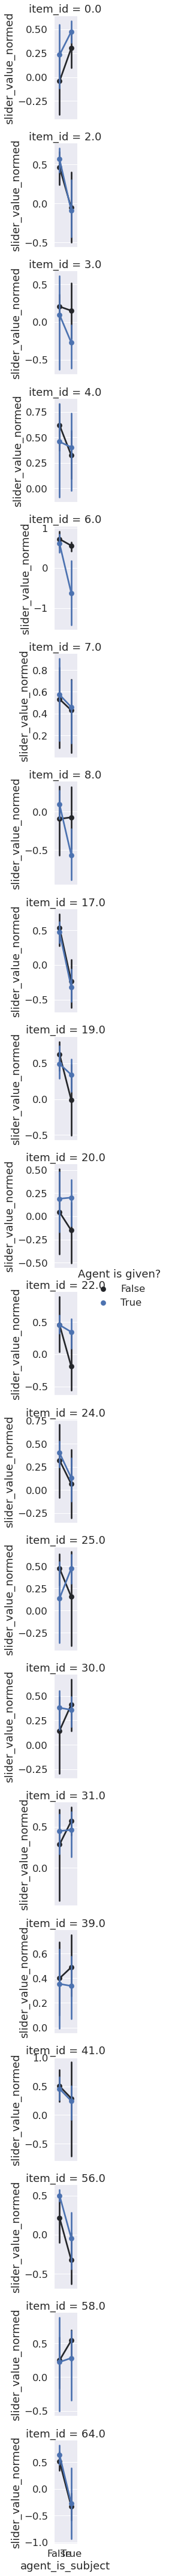

In [71]:
g = sns.FacetGrid(data=merged_df_critical.reset_index(), row="item_id", sharey=False)
g.map(sns.pointplot, "agent_is_subject", "slider_value_normed", "agent_is_given", order=[False, True], hue_order=[False, True])
g.add_legend(title="Agent is given?")
# sns.pointplot(data=merged_df.reset_index(), x="agent_is_subject", y="slider_value_normed", hue="agent_is_given")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'worms wriggl'),
  Text(1, 0, 'tadpoles swimm'),
  Text(2, 0, 'debris flow'),
  Text(3, 0, 'lights glow'),
  Text(4, 0, 'ants crawl'),
  Text(5, 0, 'bubbles foam'),
  Text(6, 0, 'fireflies glimmer'),
  Text(7, 0, 'frogs hopp'),
  Text(8, 0, 'cockroaches creep'),
  Text(9, 0, 'trepidation shak'),
  Text(10, 0, 'excitement crackl'),
  Text(11, 0, 'people bustl'),
  Text(12, 0, 'terror cours'),
  Text(13, 0, 'energy humm'),
  Text(14, 0, 'fear prickl'),
  Text(15, 0, 'trumpets ring'),
  Text(16, 0, 'bees swarm'),
  Text(17, 0, 'excitement puls'),
  Text(18, 0, 'sewage runn'),
  Text(19, 0, 'anticipation tingl')])

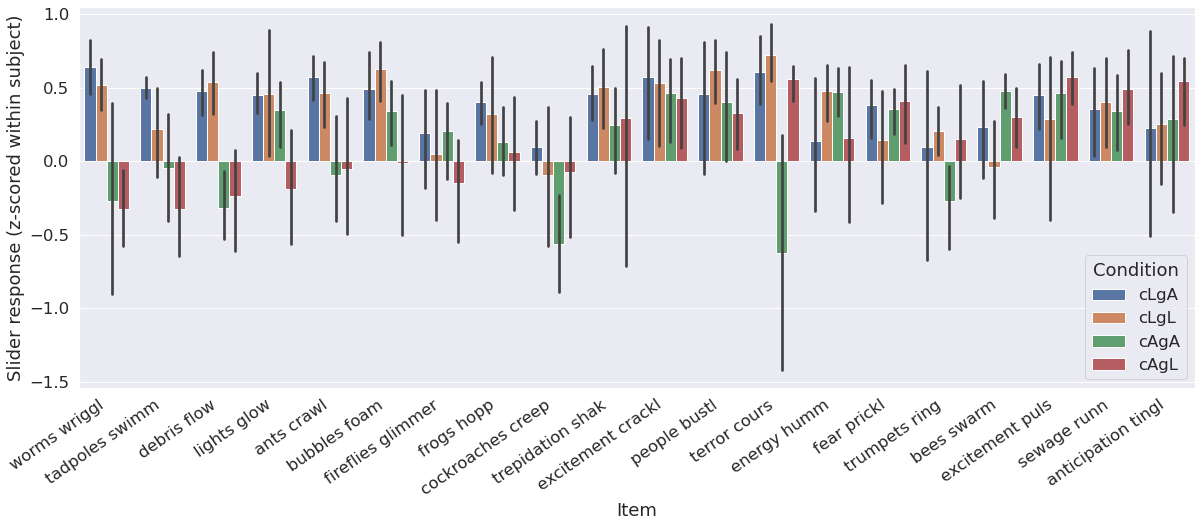

In [72]:
plt.subplots(figsize=(20, 7))
to_plot = merged_df_critical.copy()
to_plot["c"] = to_plot.agent_is_subject.map({False: "L", True: "A"})
to_plot["g"] = to_plot.agent_is_given.map({False: "L", True: "A"})
to_plot["Condition"] = "c" + to_plot.c.str.cat("g" + to_plot.g)

order = to_plot.groupby("AV").apply(lambda xs: xs[xs.Condition == "cLgA"].slider_value_normed.mean() - xs[xs.Condition == "cAgL"].slider_value_normed.mean()).sort_values(ascending=False).index

column_mappings = {
    "slider_value_normed": "Slider response (z-scored within subject)",
    "AV": "Item"
}

sns.barplot(data=to_plot.rename(columns=column_mappings),
            x=column_mappings["AV"], hue="Condition", y=column_mappings["slider_value_normed"], order=order, hue_order=["cLgA", "cLgL", "cAgA", "cAgL"])
plt.xticks(rotation=35, ha="right")

## Extras

In [73]:
pd.merge(response_df.xs("A1VX5ZKAT3S8YP:34PGFRQONPZ0JASKSXG0V1FX6U6JWX", level="uniqueid").reset_index()[["trial_index", "materials_id", "item_id", "condition_0", "condition_1", "agent_is_subject", "slider_value"]],
         materials_df[["A", "V", "L"]],
         left_on=["materials_id", "item_id"], right_index=True).sort_values("agent_is_subject")

KeyError: 'A1VX5ZKAT3S8YP:34PGFRQONPZ0JASKSXG0V1FX6U6JWX'

In [ ]:
exp_items[(exp_items.condition_0 != "filler") & (exp_items.item_id == 3)][["agent_is_subject", "slider_value_normed"]].sort_values(["agent_is_subject", "slider_value_normed"])